In [1]:
%matplotlib notebook
from pylab import *
import numpy as np
from craco.search_pipeline import location2pix, get_grid_lut_from_plan, grid_candidates,wait_for_starts,waitall,print_candidates
from craco.search_pipeline import NBINARY_POINT_FDMTIN 
import craco
import craco.search_pipeline
from craco.pyxrtutil import *
import craft.craco_plan

from craft import uvfits

from craft.craco_plan import PipelinePlan
from craft.craco import printstats
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
import time

In [2]:
!ls -lrt /data/craco/ban115/builds/

total 389448
-rw-rw-r-- 1 ban115 ban115 80018876 Dec 13  2021 binary_container_7630dd1f.xclbin
-rw-rw-r-- 1 ban115 ban115 79543372 Dec 15  2021 binary_container_01482863.xclbin
-rw-rw-r-- 1 ban115 ban115 79559468 Feb 21 21:04 binary_container_1_10688715.xclbin
-rw-rw-r-- 1 ban115 ban115 79767124 May 10 05:17 binary_container_28db073f.xclbin
-rw-rw-r-- 1 ban115 ban115 79892596 Jun 29 11:28 binary_container_fe3fef0d.xclbin


In [3]:
fits='/data/craco/ban115/test_data/frb_d0_t0_a1_sninf_lm00/frb_d0_t0_a1_sninf_lm00.fits'
xclbin='/data/craco/ban115/builds/binary_container_28db073f.xclbin'
#xclbin='/data/craco/ban115/builds/binary_container_01482863.xclbin'
xclbin='/data/craco/ban115/builds/binary_container_fe3fef0d.xclbin'

alloc_device_only=True
values = craco.search_pipeline.get_parser().parse_args([])
print(values)

Namespace(boxcar_weight='sum', cand_file='candidates.txt', cell=None, device=0, dump_boxcar_hist_buf=None, dump_candidates=None, dump_fdmt_hist_buf=None, dump_mainbufs=None, dump_uvdata=None, fdmt_scale=1.0, fft_scale=10.0, fft_shift1=0, fft_shift2=0, injection_file=None, input_scale=1.0, max_ndm=1024, nblocks=None, nbox=8, ncin=32, ndm=512, ndout=186, npix=256, nt=256, nuvmax=8192, nuvwide=8, os='2.1,2.1', run_fdmt=True, run_image=True, show=False, show_candidate_grid=None, threshold=10.0, uv='frb_d0_lm0_nt16_nant24.fits', verbose=False, wait=False, xclbin='binary_container_1.xclbin.golden')


In [4]:
device = pyxrt.device(0)
xbin = pyxrt.xclbin(xclbin)
uuid = device.load_xclbin(xbin)

In [5]:
f = uvfits.open(fits)

dms=[398,399,400,401,402,511] # need 511 so it's equivalent in allr espects to plan

plan_small = PipelinePlan(f, '', dms=dms)



INFO:root:Opening file /data/craco/ban115/test_data/frb_d0_t0_a1_sninf_lm00/frb_d0_t0_a1_sninf_lm00.fits
INFO:craft.craco_plan:making Plan values=Namespace(boxcar_weight='sum', cell=None, fdmt_scale=1.0, fft_scale=10.0, max_nbl=630.0, max_ndm=1024, nbox=8, ncin=32, ndm=2, ndout=186, npix=256, nt=256, nuvmax=8192, nuvwide=8, os='2.1,2.1', pickle_fname='pipeline.pickle', save=False, show=False, show_fdmt=False, show_image=False, threshold=3, uv='uv_data', verbose=False)
INFO:craft.craco_plan:Nbl=190 Fch1=735499993.944000 foff=1000000.047500 nchan=256 lambdamin=0.302877 uvmax=(2914.412072271962, 3548.709136210335) max baseline=(0.882709355209954, 1.0748235581559127) resolution=[70.77407077 58.12389754]arcsec uvcell=[33.70193846 27.67804645] arcsec uvcell= (23.90728653035594, 29.110504632975406) lambda FoV=[2.39658229 1.96821664] deg oversampled=(2.1, 2.1) wcs=WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 0.0  -30.0  
CRPIX : 129.0  129.0  
PC1_1 PC1_2  : 1.0

parsing values 


INFO:craft.craco_plan:FDMT plan has ntotal=5272 of 659 runs with packing efficiency 0.727997. Grid read requires efficiency of > 0.643555 of NUV=8192. History size square=256915104 minimal=163322152 =2 256MB HBM banks
INFO:craft.craco_plan:FDMT zero cell is (658, 2)=5266
INFO:craft.craco_plan:Saving uvgrid.split shape=(5245, 14) type=float64 to uv_data.uvgrid.split.txt header=ant1, ant2, u(pix), v(pix), chan1, chan2, irun, icell, total_overlap, max_idm, max_offset, offset_cff, idm_cff, fch1
INFO:craft.craco_plan:Got 3398 unique UV coords. Upper=True
INFO:craft.craco_plan:Need to write 213 groups of 16 register to pad function
INFO:craft.craco_plan:Got 3377 unique UV coords. Upper=False
INFO:craft.craco_plan:Need to write 212 groups of 16 register to pad function
INFO:craft.craco_plan:Got 5354 upper grid instructions
INFO:craft.craco_plan:Saving gridlut.upper shape=(5354, 5) type=int32 to uv_data.gridlut.upper.txt header=target_slot, uvidx, shift_flag, upix, vpix
INFO:craft.craco_plan:G

Upper registers [(37, 6), (37, 7), (38, 7), (38, 8), (39, 8), (39, 9), (40, 9), (40, 10), (40, 11), (41, 11), (102, 11), (41, 12), (42, 12), (102, 12), (42, 13), (43, 13), (102, 13), (43, 14), (102, 14), (103, 14), (18, 15), (43, 15), (44, 15), (103, 15), (18, 16), (19, 16), (44, 16), (45, 16), (103, 16), (19, 17), (20, 17), (45, 17)]
Lower registers [(26, 47), (26, 48), (27, 48), (27, 49), (28, 49), (28, 50), (29, 50), (30, 51), (31, 51), (31, 52), (32, 52), (32, 53), (33, 53), (33, 54), (34, 54), (35, 54), (35, 55), (36, 55), (53, 55), (54, 55), (6, 56), (36, 56), (37, 56), (54, 56), (55, 56), (7, 57), (8, 57), (37, 57), (38, 57), (55, 57), (56, 57), (8, 58)]


INFO:craft.craco_plan:Saving padlut.lower shape=(32640, 3) type=int32 to uv_data.padlut.lower.txt header=upix, vpix, regidx
INFO:craft.craco_plan:Saving doshift.lower shape=(4096,) type=int32 to uv_data.doshift.lower.txt header=doshift
INFO:craft.craco_plan:Saving ddreader shape=(2048,) type=uint32 to uv_data.ddreader.txt header=value


In [6]:
plan = plan_small

In [7]:
plan.nd

6

In [8]:
plan.dmax

511

In [9]:
plan_small.dmax

511

In [10]:
plan.dms[:10]

array([398, 399, 400, 401, 402, 511,   0,   0,   0,   0], dtype=uint32)

<IPython.core.display.Javascript object>


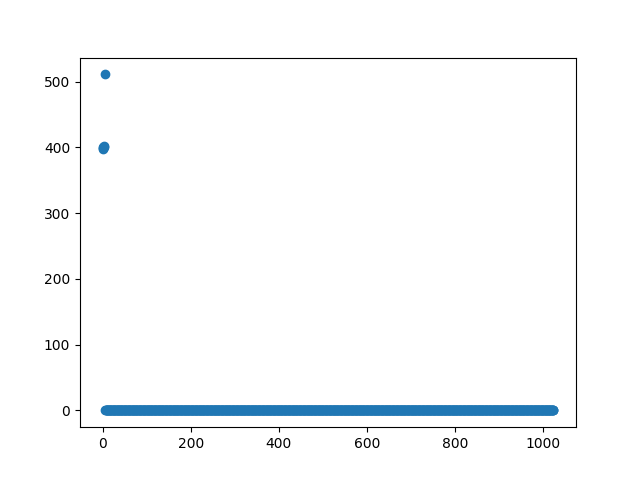

In [11]:
figure()
plot(plan.dms,'o')

In [12]:
p = craco.search_pipeline.Pipeline(device, xbin, plan, alloc_device_only)

INFO:craco.search_pipeline:2636 2677 2664
INFO:craco.search_pipeline:(180214,)


Kernel krnl_ddgrid_reader_4cu:krnl_ddgrid_reader_4cu_1 has groups
GID=0=32
GID=1=-1
GID=2=-1
GID=3=-1
GID=4=-1
GID=5=15
Kernel krnl_grid_4cu:krnl_grid_4cu_1 has groups
GID=0=-1
GID=1=-1
GID=2=-1
GID=3=-1
GID=4=-1
GID=5=6
Kernel krnl_grid_4cu:krnl_grid_4cu_2 has groups
GID=0=-1
GID=1=-1
GID=2=-1
GID=3=-1
GID=4=-1
GID=5=7
Kernel krnl_grid_4cu:krnl_grid_4cu_3 has groups
GID=0=-1
GID=1=-1
GID=2=-1
GID=3=-1
GID=4=-1
GID=5=20
Kernel krnl_grid_4cu:krnl_grid_4cu_4 has groups
GID=0=-1
GID=1=-1
GID=2=-1
GID=3=-1
GID=4=-1
GID=5=21
Kernel fft2d:fft2d_1 has groups
Kernel fft2d:fft2d_2 has groups
Kernel fft2d:fft2d_3 has groups
Kernel fft2d:fft2d_4 has groups


INFO:craco.search_pipeline:lut.shape (180214,)
INFO:craco.search_pipeline:nuv 5272
INFO:craco.search_pipeline:Allocating grid LUTs
INFO:craco.search_pipeline:Allocating FDMT Input
INFO:craco.search_pipeline:5272
INFO:craco.search_pipeline:256
INFO:craco.search_pipeline:32
INFO:craco.search_pipeline:8
INFO:craco.search_pipeline:659
INFO:craco.search_pipeline:186
INFO:craco.search_pipeline:FDMT input buffer size 164.75 MB
INFO:craco.search_pipeline:Allocating FDMT history


Kernel krnl_boxc_4cu:krnl_boxc_4cu_1 has groups
GID=0=-1
GID=1=-1
GID=2=-1
GID=3=54
GID=4=54
GID=5=4
Kernel fdmt_tunable_c32:fdmt_tunable_c32_1 has groups
GID=0=52
GID=1=32
GID=2=53
GID=3=53
GID=4=14
Allocated 360428 bytes flags=flags.normal groupid=6 address=0x60000000
Allocated 360428 bytes flags=flags.normal groupid=7 address=0x70000000
Allocated 360428 bytes flags=flags.normal groupid=20 address=0x140000000
Allocated 360428 bytes flags=flags.normal groupid=21 address=0x150000000
Allocated 172752896 bytes flags=flags.normal groupid=52 address=0x90000000
Allocated 268435456 bytes flags=flags.normal groupid=53 address=0xa0000000


INFO:craco.search_pipeline:Allocating mainbuf
INFO:craco.search_pipeline:FDMT output buffer size 10.286819458007812 GB
INFO:craco.search_pipeline:Mainbuf shape is (659, 186, 11, 256, 8, 2) breaking into 8 buffers of [83, 186, 11, 256, 8, 2]


Allocated 653728 bytes flags=flags.normal groupid=14 address=0xe0000000
Allocated 1391149056 bytes flags=flags.normal groupid=32 address=0x4000000000
Allocated 1391149056 bytes flags=flags.normal groupid=32 address=0x4052eb4000
Allocated 1391149056 bytes flags=flags.normal groupid=32 address=0x40a5d68000
Allocated 1391149056 bytes flags=flags.normal groupid=32 address=0x40f8c1c000
Allocated 1391149056 bytes flags=flags.normal groupid=32 address=0x414bad0000
Allocated 1391149056 bytes flags=flags.normal groupid=32 address=0x419e984000
Allocated 1391149056 bytes flags=flags.normal groupid=32 address=0x41f1838000
Allocated 1391149056 bytes flags=flags.normal groupid=32 address=0x42446ec000


INFO:craco.search_pipeline:Allocating ddreader_lut
INFO:craco.search_pipeline:Allocating boxcar_history


Allocated 8192 bytes flags=flags.normal groupid=15 address=0xf0000000
Allocated 939524096 bytes flags=flags.normal groupid=54 address=0x0


INFO:craco.search_pipeline:Boxcar history (1024, 7, 256, 256) 939524096 2
INFO:craco.search_pipeline:Allocating candidates


Allocated 1048576 bytes flags=flags.normal groupid=4 address=0x40000000


In [13]:
from Visibility_injector.inject_in_fake_data import FakeVisibility
fvfile = '/data/craco/gup037/test_runs_of_craco_pipeline/injections/repitetive_dm_401_injection.yml'
fv = FakeVisibility(plan, fvfile)
fvblk = fv.get_fake_data_block()
input_dmsamps = 401
nblk = 2

Visbility_injector - INFO: Loading the injection param file
INFO:Visbility_injector:Loading the injection param file
Visbility_injector - INFO: plan.shape = (190, 256, 256), Amp ratio = 0.07254762501100116
INFO:Visbility_injector:plan.shape = (190, 256, 256), Amp ratio = 0.07254762501100116


THIS IS THE CHANGED CODEEEEE
THIS IS THE CHANGED CODEEEEE
THIS IS THE CHANGED CODEEEEE
THIS IS THE CHANGED CODEEEEE
THIS IS THE CHANGED CODEEEEE
THIS IS THE CHANGED CODEEEEE
THIS IS THE CHANGED CODEEEEE
THIS IS THE CHANGED CODEEEEE
THIS IS THE CHANGED CODEEEEE
THIS IS THE CHANGED CODEEEEE
THIS IS THE CHANGED CODEEEEE
THIS IS THE CHANGED CODEEEEE
THIS IS THE CHANGED CODEEEEE
THIS IS THE CHANGED CODEEEEE
THIS IS THE CHANGED CODEEEEE
THIS IS THE CHANGED CODEEEEE
THIS IS THE CHANGED CODEEEEE
THIS IS THE CHANGED CODEEEEE
THIS IS THE CHANGED CODEEEEE
THIS IS THE CHANGED CODEEEEE
THIS IS THE CHANGED CODEEEEE
THIS IS THE CHANGED CODEEEEE
THIS IS THE CHANGED CODEEEEE
THIS IS THE CHANGED CODEEEEE
THIS IS THE CHANGED CODEEEEE
THIS IS THE CHANGED CODEEEEE
THIS IS THE CHANGED CODEEEEE
THIS IS THE CHANGED CODEEEEE
THIS IS THE CHANGED CODEEEEE
THIS IS THE CHANGED CODEEEEE
THIS IS THE CHANGED CODEEEEE
THIS IS THE CHANGED CODEEEEE
THIS IS THE CHANGED CODEEEEE
THIS IS THE CHANGED CODEEEEE
THIS IS THE CH

In [14]:
cat $fvfile

add_noise: false
furby_props:
- dm_samps: 401.0
  noise_per_sample: 1.0
  shape: tophat
  snr: 20.0
  spectrum: flat
  subsample_phase: 0.5
  tau0: 1.0e-16
  width_samps: 0.01
- dm_samps: 401.0
  noise_per_sample: 1.0
  shape: tophat
  snr: 20.0
  spectrum: flat
  subsample_phase: 0.5
  tau0: 1.0e-16
  width_samps: 0.01
- dm_samps: 401.0
  noise_per_sample: 1.0
  shape: tophat
  snr: 20.0
  spectrum: flat
  subsample_phase: 0.5
  tau0: 1.0e-16
  width_samps: 0.01
- dm_samps: 401.0
  noise_per_sample: 1.0
  shape: tophat
  snr: 20.0
  spectrum: flat
  subsample_phase: 0.5
  tau0: 1.0e-16
  width_samps: 0.01
- dm_samps: 401.0
  noise_per_sample: 1.0
  shape: tophat
  snr: 20.0
  spectrum: flat
  subsample_phase: 0.5
  tau0: 1.0e-16
  width_samps: 0.01
- dm_samps: 401.0
  noise_per_sample: 1.0
  shape: tophat
  snr: 20.0
  spectrum: flat
  subsample_phase: 0.5
  tau0: 1.0e-16
  width_samps: 0.01
- dm_samps: 401.0
  noise_per_sample: 1.0
  shape: tophat
  snr: 20.0
  spectrum: flat
  subsa

In [15]:
inblocks = [next(fvblk) for i in range(nblk)]

Visbility_injector - INFO: Simulating 0th furby with params:
{'shape': 'tophat', 'spectrum_type': 'flat', 'dmsmear': True, 'subsample_phase': 0.5, 'noise_per_sample': 1.0, 'tfactor': 100, 'tot_nsamps': None, 'scattering_index': 4.4, 'snr': 20.0, 'width': 1.7e-05, 'dm': 198.13585228849666, 'tau0': 1e-16}
INFO:Visbility_injector:Simulating 0th furby with params:
{'shape': 'tophat', 'spectrum_type': 'flat', 'dmsmear': True, 'subsample_phase': 0.5, 'noise_per_sample': 1.0, 'tfactor': 100, 'tot_nsamps': None, 'scattering_index': 4.4, 'snr': 20.0, 'width': 1.7e-05, 'dm': 198.13585228849666, 'tau0': 1e-16}
Visbility_injector - INFO: Block ID: 0, start_samp = 0, end_samp = 256
INFO:Visbility_injector:Block ID: 0, start_samp = 0, end_samp = 256
Visbility_injector - INFO: Injection will start in this block
INFO:Visbility_injector:Injection will start in this block
Visbility_injector - INFO: injection_start_samp_within_block = 2
INFO:Visbility_injector:injection_start_samp_within_block = 2
Visbil

PIxel values =  [[129. 129.]]
DIRCOS here [[-0.  0.  1.]]


Visbility_injector - INFO: Block ID: 1, start_samp = 256, end_samp = 512
INFO:Visbility_injector:Block ID: 1, start_samp = 256, end_samp = 512
Visbility_injector - INFO: injection_start_samp_within_block = 0
INFO:Visbility_injector:injection_start_samp_within_block = 0
Visbility_injector - INFO: injection_end_samp_within_block = 244
INFO:Visbility_injector:injection_end_samp_within_block = 244
Visbility_injector - INFO: This was the last block which had a section of the frb, now onto the next one
INFO:Visbility_injector:This was the last block which had a section of the frb, now onto the next one
Visbility_injector - INFO: Simulating 1th furby with params:
{'shape': 'tophat', 'spectrum_type': 'flat', 'dmsmear': True, 'subsample_phase': 0.5, 'noise_per_sample': 1.0, 'tfactor': 100, 'tot_nsamps': None, 'scattering_index': 4.4, 'snr': 20.0, 'width': 1.7e-05, 'dm': 198.13585228849666, 'tau0': 1e-16}
INFO:Visbility_injector:Simulating 1th furby with params:
{'shape': 'tophat', 'spectrum_typ

PIxel values =  [[129. 129.]]
DIRCOS here [[-0.  0.  1.]]


In [16]:
inblocks = np.array(inblocks)

In [17]:
inblocks.shape

(2, 190, 256, 256)

In [18]:
inblocksum = inblocks.sum(axis=(1,2,3))
inblocksum.reshape(-1,2)

array([[3307.8796+0.j, 3165.8508+0.j]], dtype=complex64)

In [19]:
assert np.all(inblocks[::2, ...] == inblocks[0,...])
assert np.all(inblocks[1::2, ...] == inblocks[1,...])

In [20]:
p.clear_buffers(values)
values.run_fdmt = True
values.run_image = True
values.threshold = 2
values.input_scale = 1024
values.fft_scale1 = 0
values.fft_scale2 = 0
cands = []
idm  = 400
pix = 0

bchist = []
mbhist = []

mb0 = p.all_mainbufs[0]

for iblk in range(nblk):
    p.copy_input(inblocks[iblk,...], values)
    p.run(iblk, values).wait()
    cands.append(p.get_candidates().copy())
    print(f'Got {len(cands[-1])} candidates')
    p.boxcar_history.copy_from_device()
    bchist.append(p.boxcar_history.nparr[idm,:,128,128].copy())
    #p.[83, 186, 11, 256, 8, 2]
    mb0.copy_from_device()
    mbhist.append(mb0.nparr[0,:,:,:,0,0].copy())
    
    
        

INFO:craco.search_pipeline:Clearing mainbuf data NBLK=11
INFO:craco.search_pipeline:nConfiguration just before pipeline running 
ndm=6 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=192 threshold=128 shift1=0 shift2=0 fft_cfg=c00000

INFO:craco.search_pipeline:Running fdmt
INFO:craco.search_pipeline:fdmt complete
INFO:craco.search_pipeline:Last candidate is (0, 0, 0, 0, 0)
INFO:craco.search_pipeline:Candidates cleared
INFO:craco.search_pipeline:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:Last candidate is (0, 0, 0, 0, 0)


Got 0 candidates


INFO:craco.search_pipeline:nConfiguration just before pipeline running 
ndm=6 nchunk_time=32 tblk=1 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=192 threshold=128 shift1=0 shift2=0 fft_cfg=c00000

INFO:craco.search_pipeline:Running fdmt
INFO:craco.search_pipeline:fdmt complete
INFO:craco.search_pipeline:Last candidate is (0, 0, 0, 0, 0)
INFO:craco.search_pipeline:Candidates cleared
INFO:craco.search_pipeline:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:Last candidate is (0, 0, 0, 0, 0)


Got 517 candidates


In [21]:
bchist = np.array(bchist)
mbhist = np.array(mbhist)

In [22]:
[len(c) for c in cands]

[0, 517]

In [23]:
maxcand = [max(c, key=lambda x: x['snr']) for c in cands if len(c) != 0]
maxcand

[(1987, 0, 2, 243, 4)]

In [24]:
maxcand[0].dtype

dtype([('snr', '<i2'), ('loc_2dfft', '<u2'), ('boxc_width', 'u1'), ('time', 'u1'), ('dm', '<u2')])

<IPython.core.display.Javascript object>


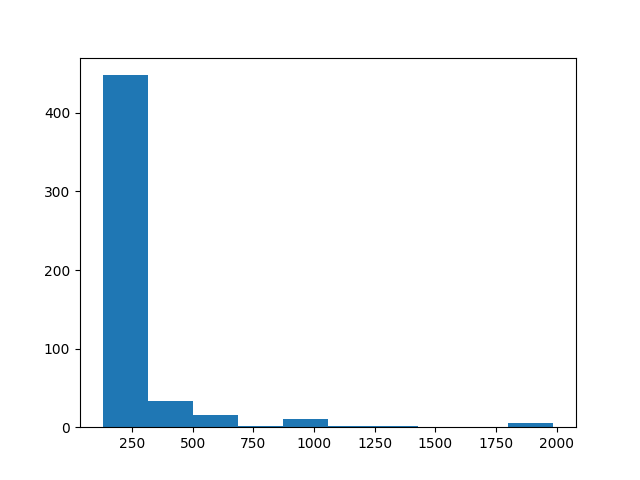

(array([448.,  33.,  16.,   2.,  10.,   1.,   2.,   0.,   0.,   5.]),
 array([ 129. ,  314.8,  500.6,  686.4,  872.2, 1058. , 1243.8, 1429.6,
        1615.4, 1801.2, 1987. ]),
 <BarContainer object of 10 artists>)

In [25]:
all_cands = []
for c in cands:
    all_cands.extend(c)
    
snrs = [c['snr'] for c in all_cands]
figure()
hist(snrs)

In [26]:
mbhist.shape

(2, 186, 11, 256)

In [27]:
dt = np.dtype('float32')
dt.itemsize

4

In [28]:
inbuf = p.inbuf.copy_from_device().nparr
din = inbuf[0,:,:,0,0]
inbuf.shape

(659, 256, 32, 8, 2)

<IPython.core.display.Javascript object>


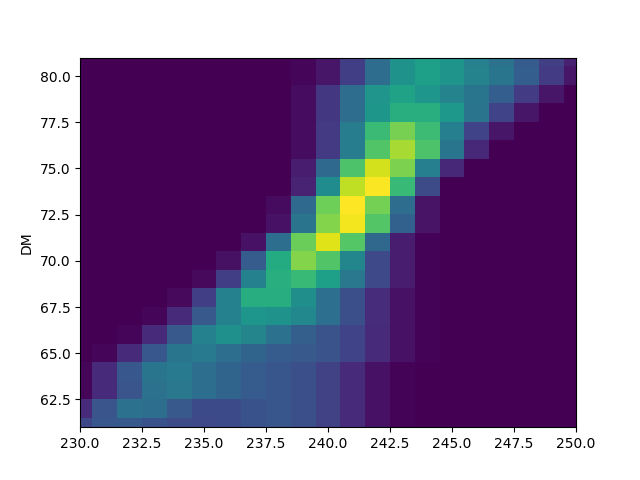

(61.0, 81.0)

In [29]:
mbdata = mbhist[1,:,1,:]
figure()
imshow(mbdata, aspect='auto', origin='lower')
xlabel('')
ylabel('DM')
xlim(240-10,240+10)
ylim(71-10,71+10)

In [30]:
print('value at expected place from eyeballing input is', mbdata[71,240])
print('max value is', mbdata.max(), 'at', np.unravel_index(mbdata.argmax(), mbdata.shape), f'recovery={mbdata.max()/din.sum()}')

value at expected place from eyeballing input is 4053
max value is 4264 at (73, 241) recovery=0.9775332416322787


In [31]:
dir(plan.fdmt_plan.runs[0])
plan.fdmt_plan.runs[0].fch1

735499993.944

In [32]:
plan.fdmt_plan.runs[0].chan_start

0

<IPython.core.display.Javascript object>


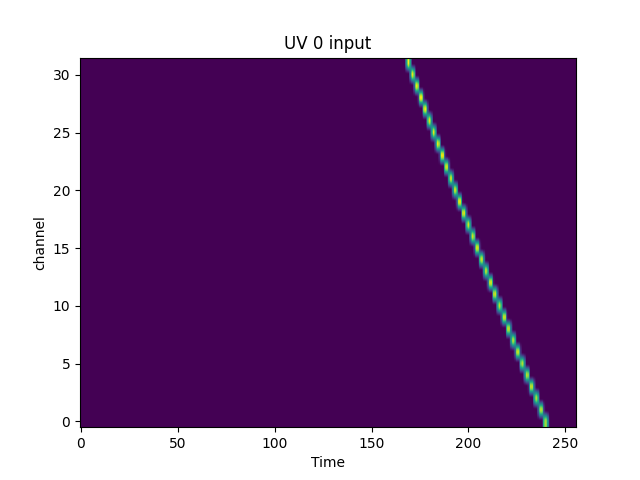

71

In [33]:
figure()
imshow(din.T, aspect='auto', origin='lower')
xlabel('Time')
ylabel('channel')
title('UV 0 input')
# finishes at 240 - begins at 169
tstart = 169
tend = 240
tdiff = tend - tstart
tdiff

In [34]:
print('Input sum for UV 0 is', inbuf[0,:,:,0,0].sum())

Input sum for UV 0 is 4362


In [35]:
tblks = (9,10,0)

outputs = np.zeros((len(tblks), ncu, ndm, nchunk_time, nuvrest, NUVWIDE//OUTPUT_NUV, OUTPUT_NT, OUTPUT_NUV, 2), dtype=np.int16)

NameError: name 'ncu' is not defined

In [ ]:
mainbuf = p.copy_mainbuf()

In [ ]:
plan.nd

In [ ]:
outputs.shape

In [ ]:
transposeidxs = [0, 3,1,6,2,4,5,7,8]
outputsrs = outputs.copy().transpose(transposeidxs)
outputsrs.shape

In [ ]:
s = np.array(outputsrs.shape)

outputsrs = outputsrs.reshape(s[0], s[1:4].prod(),s[4],s[5:8].prod(),s[8])
outputsrs.shape

In [ ]:
np.all(outputs == 0)

In [ ]:
np.all(outputsrs == 0)

In [ ]:
craco_pybind11.krnl.NT

In [ ]:
craco_pybind11.krnl.NUVWIDE

In [ ]:
np.all(outputsrs[0,...] == outputsrs[2,...])

In [ ]:
fig, ax = subplots(1,len(tblks))
for itblk, tblk in enumerate(tblks):
    ax[itblk].imshow(outputsrs[itblk,:,:,0,0].T, aspect='auto', origin='lower')
    ax[itblk].set_title(f'tblk={tblk}')

In [ ]:
outputsrs.shape

In [ ]:
fig, ax = subplots(1,len(tblks))
fig.set_size_inches((10,5))
for itblk, tblk in enumerate(tblks):
    ax[itblk].imshow(outputsrs[itblk,:,1,:,0], aspect='auto', origin='lower')
    ax[itblk].set_title(f'Tblk {tblk}')
    ax[itblk].set_xlabel('UV')
    ax[itblk].set_ylabel('time')
    
         

In [ ]:
outputsrs.shape

In [ ]:
outputsrs.shape[-2]/2

In [ ]:
figure()
imshow(outputsrs[0,:,1,:,0]-outputsrs[2,:,1,:,0], aspect='auto', origin='lower')

In [ ]:
mainbuf.shape

In [ ]:
figure()
imshow(mainbuf[0,:,:,:,0,0].reshape(186,-1), aspect='auto', origin='lower')
for b in range(11):
    axvline(b*256,c='r', alpha=0.2)

In [ ]:
mainbufrs = mainbuf[0:1,...].transpose([0,4,1,2,3,5]).reshape(-1,186,11*256,2)
mainbufrs.shape

In [ ]:
figure()
imshow(mainbufrs[0,:,:,0],aspect='auto',origin='lower')

In [ ]:
from craco_pybind11.ddgrid_reader import load_luts, calc_indexs
uvrest=0


In [ ]:
luts_small = load_luts(plan_small.ddreader_lut[:-1])
luts_small

In [38]:
dmidx = 3
r = calc_indexs(dmidx, uvrest,luts_small)
print(f"IDM={r.idm} tback={r.tback} for idm={plan_small.dms[dmidx]}")

NameError: name 'calc_indexs' is not defined

In [39]:
run = plan.fdmt_plan.runs[0]
str(run)

'ncells=8 fch1=735499993.944 chan_start=0 total_overlap=256'

In [40]:
run.cells

[Cell blid=3092.0 chan=0-31 freq=735499993.944000-766499995.416500 uvpix=(124, 135) upper_idx=23727 uvpix_upper=(132, 121),
 Cell blid=2578.0 chan=0-31 freq=735499993.944000-766499995.416500 uvpix=(119, 125) upper_idx=25027 uvpix_upper=(137, 131),
 Cell blid=2314.0 chan=0-31 freq=735499993.944000-766499995.416500 uvpix=(112, 135) upper_idx=23739 uvpix_upper=(144, 121),
 Cell blid=1030.0 chan=0-31 freq=735499993.944000-766499995.416500 uvpix=(121, 137) upper_idx=23459 uvpix_upper=(135, 119),
 Cell blid=1029.0 chan=0-31 freq=735499993.944000-766499995.416500 uvpix=(128, 123) upper_idx=23990 uvpix_upper=(128, 123),
 Cell blid=774.0 chan=0-31 freq=735499993.944000-766499995.416500 uvpix=(118, 133) upper_idx=24000 uvpix_upper=(138, 123),
 Cell blid=772.0 chan=0-31 freq=735499993.944000-766499995.416500 uvpix=(125, 124) upper_idx=24119 uvpix_upper=(125, 124),
 Cell blid=518.0 chan=0-31 freq=735499993.944000-766499995.416500 uvpix=(116, 133) upper_idx=24002 uvpix_upper=(140, 123)]

In [41]:
run.idm_cff

0.18200368699564004

In [42]:
run.idm_cff*401

72.98347848525165

In [43]:
plan.fmin

735499993.944

In [44]:
din = inbuf[0,:,:,0,0]
din.shape

(256, 32)

In [ ]:
from craft import fdmt

In [67]:
thefdmt = fdmt.Fdmt(735e6, 1e6, 256, 1024, 256, do_correction=True)
thefdmt.get_config?
thefdmt.get_config(1,2,3)

(1, 1, 2)

In [64]:
thefdmt = fdmt.Fdmt(run.fch1-plan.foff/2, plan.foff, plan.ncin, plan.ndout, 256, do_correction=True)
thefdmt.n_t

256

In [66]:
thefdmt.f_min

734999993.9202499

In [58]:
thefdmt.get_config(0,3,10)

(3, 2, 8)

In [46]:
dout = thefdmt(din.T)
doutones = thefdmt(np.ones_like(din.T))
nadds = doutones[:,din.shape[0]-1]
bestdm, bestt = np.unravel_index(dout.argmax(), dout.shape)
recovery = dout.max()/din.sum()
nadd = nadds[bestdm]
pseudo_sn = recovery/np.sqrt(nadd)
print('max is', dout.max(), 'at', (bestdm,bestt), 'sum is', din.sum(), f'nadd={nadd} recover=f{recovery} pseudosn={pseudo_sn*100:0.1f}')

max is 3396.0 at (71, 240) sum is 4362 nadd=64.0 recover=f0.7785419532324622 pseudosn=9.7


<IPython.core.display.Javascript object>


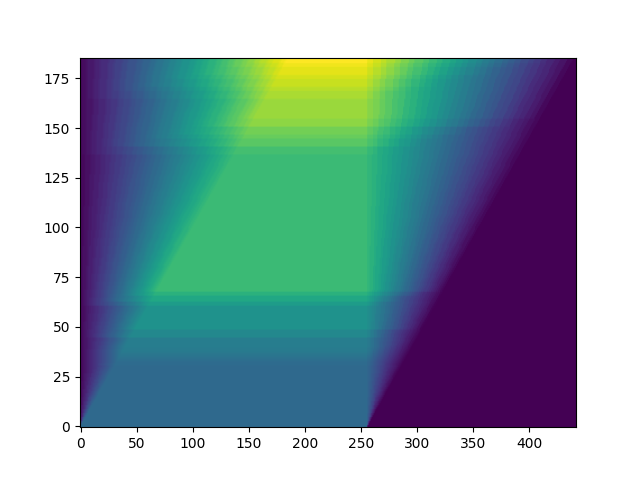

In [47]:
figure()
imshow(doutones, aspect='auto', origin='lower')

<IPython.core.display.Javascript object>


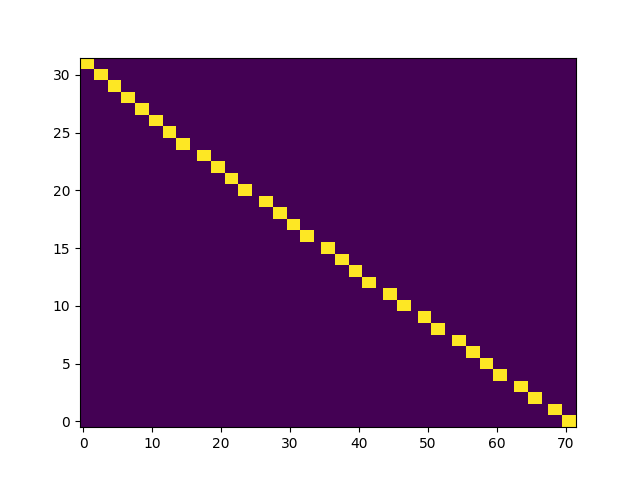

In [49]:
figure()
imshow(thefdmt.add_frb_track(71), aspect='auto', origin='lower')

In [51]:
# single jupyter cell FDMT to play with for Vivek 
def myfdmt(thefdmt, din, dt_res=1):    
    maxdt = thefdmt.max_dt
    nt = thefdmt.n_t
    df = thefdmt.d_f # initial resolution of the input channels
    fmin = thefdmt.f_min
    fmax = thefdmt.f_max
    init_ndt = int(np.ceil(fdmt.calc_delta_t(fmin, fmax, fmin, fmin+df, maxdt)*dt_res))
    dinit = np.zeros((thefdmt.n_f, init_ndt, thefdmt.n_t))

    # initialisation read the input data
    dinit[:,0,:] = din.T

    # So for idm =1 we want the sum of the current value and the previous value
    for idm in range(1, init_ndt):
        dinit[:, idm,:] = dinit[:, idm-1,:]
        ioff = idm // dt_res # Half dm steps should probably be convolved with a trapezium - but I hven't bothered.
        if idm % dt_res == (dt_res - 1):
            if ioff == 0:
                dinit[:, idm, :] += din.T[:, :]
            else:
                dinit[:, idm, ioff:] += din.T[:, :-ioff]

    iterdata = [dinit]

    currnchan = thefdmt.n_f

    for iterno in range(5):
        df *= 2 # Resolution of output channel
        output_nchan = currnchan // 2 # number of output channels
        ndt = int(np.ceil(fdmt.calc_delta_t(fmin, fmax, fmin, fmin+df, maxdt)*dt_res))
        dprev = iterdata[-1]
        dout = np.zeros((output_nchan, ndt, nt))
        iterdata.append(dout)

        for c in range(output_nchan):
            id1_cff = thefdmt.calc_id1_cff(iterno, c)
            off_cff = thefdmt.calc_offset_cff(iterno, c)
            f_start = thefdmt.freq_of_chan(iterno+1, c) # bottom of bottom channel
            f_end = thefdmt.freq_of_chan(iterno+1, c+1) # top of bottom channel
            f_start2 = fmin + c*df
            f_end2 = fmin + (c+1)*df
            assert f_start == f_start2
            assert f_end == f_end2
            # largest DM we need to calculate for this iteration is the DM at the
            # bottom of the band - if we don't want to we don't have to do all the dms for all channels
            #print(fmin, fmax, f_start, f_end)
            thisndt = int(np.ceil(fdmt.calc_delta_t(fmin, fmax, f_start, f_end, maxdt)*dt_res))
            assert thisndt <= ndt
            print(iterno, c, f_start, f_end, ndt, thisndt)
            c1 = 2*c # index of bottom channel in the input
            c2 = 2*c + 1 # index of top channel in the input

            for idt in range(thisndt):                
                dt = idt/dt_res
                # dt is the dm of interest, but its value needs to be multiplid by dt_res to find its 
                # location in the array
                id1 = int(np.round(id1_cff*dt*dt_res))                 
                off = int(np.round(off_cff*dt))
                id2 = int(np.round((dt - off_cff*dt)*dt_res))
                print(iterno, c, dt, idt, id1, id2, off, dprev.shape)
                # first copy in the bottom channel - we'll add a delayed version of the top channel next
                dout[c, idt, :] = dprev[c1, id1, : ]

                # Numpy indexing doesn't like offset = 0:
                if off == 0:
                    dout[c, idt, :] += dprev[c2, id2, :]
                else:
                    dout[c, idt, off:] += dprev[c2, id2, :-off]

        currnchan //= 2 # Fewer channels now
        
    return iterdata


dt_res = 1
iterdata = myfdmt(thefdmt, din, dt_res=dt_res)
iterdata2 = myfdmt(thefdmt, np.ones_like(din), dt_res=dt_res)
nadds = iterdata2[-1][0,:,-1]


0 0 734499993.8965 736499993.9915 14 14
0 0 0.0 0 0 0 0 (32, 8, 256)
0 0 1.0 1 0 0 1 (32, 8, 256)
0 0 2.0 2 1 0 2 (32, 8, 256)
0 0 3.0 3 1 1 2 (32, 8, 256)
0 0 4.0 4 1 1 3 (32, 8, 256)
0 0 5.0 5 1 1 4 (32, 8, 256)
0 0 6.0 6 2 1 5 (32, 8, 256)
0 0 7.0 7 2 2 5 (32, 8, 256)
0 0 8.0 8 2 2 6 (32, 8, 256)
0 0 9.0 9 2 2 7 (32, 8, 256)
0 0 10.0 10 3 2 8 (32, 8, 256)
0 0 11.0 11 3 3 8 (32, 8, 256)
0 0 12.0 12 3 3 9 (32, 8, 256)
0 0 13.0 13 3 3 10 (32, 8, 256)
0 1 736499993.9915 738499994.0865 14 14
0 1 0.0 0 0 0 0 (32, 8, 256)
0 1 1.0 1 0 0 1 (32, 8, 256)
0 1 2.0 2 1 0 2 (32, 8, 256)
0 1 3.0 3 1 1 2 (32, 8, 256)
0 1 4.0 4 1 1 3 (32, 8, 256)
0 1 5.0 5 1 1 4 (32, 8, 256)
0 1 6.0 6 2 1 5 (32, 8, 256)
0 1 7.0 7 2 2 5 (32, 8, 256)
0 1 8.0 8 2 2 6 (32, 8, 256)
0 1 9.0 9 2 2 7 (32, 8, 256)
0 1 10.0 10 3 2 8 (32, 8, 256)
0 1 11.0 11 3 3 8 (32, 8, 256)
0 1 12.0 12 3 3 9 (32, 8, 256)
0 1 13.0 13 3 3 10 (32, 8, 256)
0 2 738499994.0865 740499994.1815001 14 14
0 2 0.0 0 0 0 0 (32, 8, 256)
0 2 1.0 1 0 0 1 (3

1 3 4.0 4 2 1 3 (16, 14, 256)
1 3 5.0 5 2 2 3 (16, 14, 256)
1 3 6.0 6 2 2 4 (16, 14, 256)
1 3 7.0 7 3 3 4 (16, 14, 256)
1 3 8.0 8 3 3 5 (16, 14, 256)
1 3 9.0 9 3 3 6 (16, 14, 256)
1 3 10.0 10 4 4 6 (16, 14, 256)
1 3 11.0 11 4 4 7 (16, 14, 256)
1 3 12.0 12 5 4 8 (16, 14, 256)
1 3 13.0 13 5 5 8 (16, 14, 256)
1 3 14.0 14 5 5 9 (16, 14, 256)
1 3 15.0 15 6 6 9 (16, 14, 256)
1 3 16.0 16 6 6 10 (16, 14, 256)
1 3 17.0 17 6 6 11 (16, 14, 256)
1 3 18.0 18 7 7 11 (16, 14, 256)
1 3 19.0 19 7 7 12 (16, 14, 256)
1 3 20.0 20 8 7 13 (16, 14, 256)
1 3 21.0 21 8 8 13 (16, 14, 256)
1 3 22.0 22 8 8 14 (16, 14, 256)
1 3 23.0 23 9 9 14 (16, 14, 256)
1 3 24.0 24 9 9 15 (16, 14, 256)
1 4 750499994.6565002 754499994.8465003 27 25
1 4 0.0 0 0 0 0 (16, 14, 256)
1 4 1.0 1 0 0 1 (16, 14, 256)
1 4 2.0 2 1 1 1 (16, 14, 256)
1 4 3.0 3 1 1 2 (16, 14, 256)
1 4 4.0 4 2 1 3 (16, 14, 256)
1 4 5.0 5 2 2 3 (16, 14, 256)
1 4 6.0 6 2 2 4 (16, 14, 256)
1 4 7.0 7 3 3 4 (16, 14, 256)
1 4 8.0 8 3 3 5 (16, 14, 256)
1 4 9.0 9 3 3 6

3 0 85.0 85 41 39 46 (4, 51, 256)
3 0 86.0 86 41 40 46 (4, 51, 256)
3 0 87.0 87 41 40 47 (4, 51, 256)
3 0 88.0 88 42 41 47 (4, 51, 256)
3 0 89.0 89 42 41 48 (4, 51, 256)
3 0 90.0 90 43 41 49 (4, 51, 256)
3 0 91.0 91 43 42 49 (4, 51, 256)
3 0 92.0 92 44 42 50 (4, 51, 256)
3 0 93.0 93 44 43 50 (4, 51, 256)
3 0 94.0 94 45 43 51 (4, 51, 256)
3 0 95.0 95 45 44 51 (4, 51, 256)
3 0 96.0 96 46 44 52 (4, 51, 256)
3 0 97.0 97 46 45 52 (4, 51, 256)
3 0 98.0 98 47 45 53 (4, 51, 256)
3 0 99.0 99 47 46 53 (4, 51, 256)
3 1 750499994.6565002 766499995.4165004 100 94
3 1 0.0 0 0 0 0 (4, 51, 256)
3 1 1.0 1 0 0 1 (4, 51, 256)
3 1 2.0 2 1 1 1 (4, 51, 256)
3 1 3.0 3 1 1 2 (4, 51, 256)
3 1 4.0 4 2 2 2 (4, 51, 256)
3 1 5.0 5 2 2 3 (4, 51, 256)
3 1 6.0 6 3 3 3 (4, 51, 256)
3 1 7.0 7 3 3 4 (4, 51, 256)
3 1 8.0 8 4 4 4 (4, 51, 256)
3 1 9.0 9 4 4 5 (4, 51, 256)
3 1 10.0 10 5 5 5 (4, 51, 256)
3 1 11.0 11 5 5 6 (4, 51, 256)
3 1 12.0 12 6 6 6 (4, 51, 256)
3 1 13.0 13 6 6 7 (4, 51, 256)
3 1 14.0 14 7 6 8 (4, 51, 256

4 0 132.0 132 66 62 70 (2, 100, 256)
4 0 133.0 133 67 62 71 (2, 100, 256)
4 0 134.0 134 67 63 71 (2, 100, 256)
4 0 135.0 135 68 63 72 (2, 100, 256)
4 0 136.0 136 68 64 72 (2, 100, 256)
4 0 137.0 137 69 64 73 (2, 100, 256)
4 0 138.0 138 69 65 73 (2, 100, 256)
4 0 139.0 139 70 65 74 (2, 100, 256)
4 0 140.0 140 70 66 74 (2, 100, 256)
4 0 141.0 141 71 66 75 (2, 100, 256)
4 0 142.0 142 71 67 75 (2, 100, 256)
4 0 143.0 143 72 67 76 (2, 100, 256)
4 0 144.0 144 72 67 77 (2, 100, 256)
4 0 145.0 145 73 68 77 (2, 100, 256)
4 0 146.0 146 73 68 78 (2, 100, 256)
4 0 147.0 147 74 69 78 (2, 100, 256)
4 0 148.0 148 74 69 79 (2, 100, 256)
4 0 149.0 149 75 70 79 (2, 100, 256)
4 0 150.0 150 75 70 80 (2, 100, 256)
4 0 151.0 151 76 71 80 (2, 100, 256)
4 0 152.0 152 76 71 81 (2, 100, 256)
4 0 153.0 153 77 72 81 (2, 100, 256)
4 0 154.0 154 77 72 82 (2, 100, 256)
4 0 155.0 155 78 73 82 (2, 100, 256)
4 0 156.0 156 78 73 83 (2, 100, 256)
4 0 157.0 157 79 74 83 (2, 100, 256)
4 0 158.0 158 79 74 84 (2, 100, 256)
4

0 13 9.0 9 2 2 7 (32, 8, 256)
0 13 10.0 10 3 2 8 (32, 8, 256)
0 13 11.0 11 3 3 8 (32, 8, 256)
0 13 12.0 12 3 3 9 (32, 8, 256)
0 14 762499995.2265004 764499995.3215004 14 13
0 14 0.0 0 0 0 0 (32, 8, 256)
0 14 1.0 1 0 0 1 (32, 8, 256)
0 14 2.0 2 1 0 2 (32, 8, 256)
0 14 3.0 3 1 1 2 (32, 8, 256)
0 14 4.0 4 1 1 3 (32, 8, 256)
0 14 5.0 5 1 1 4 (32, 8, 256)
0 14 6.0 6 2 1 5 (32, 8, 256)
0 14 7.0 7 2 2 5 (32, 8, 256)
0 14 8.0 8 2 2 6 (32, 8, 256)
0 14 9.0 9 2 2 7 (32, 8, 256)
0 14 10.0 10 3 2 8 (32, 8, 256)
0 14 11.0 11 3 3 8 (32, 8, 256)
0 14 12.0 12 3 3 9 (32, 8, 256)
0 15 764499995.3215004 766499995.4165004 14 13
0 15 0.0 0 0 0 0 (32, 8, 256)
0 15 1.0 1 0 0 1 (32, 8, 256)
0 15 2.0 2 1 0 2 (32, 8, 256)
0 15 3.0 3 1 1 2 (32, 8, 256)
0 15 4.0 4 1 1 3 (32, 8, 256)
0 15 5.0 5 1 1 4 (32, 8, 256)
0 15 6.0 6 2 1 5 (32, 8, 256)
0 15 7.0 7 2 2 5 (32, 8, 256)
0 15 8.0 8 2 2 6 (32, 8, 256)
0 15 9.0 9 2 2 7 (32, 8, 256)
0 15 10.0 10 3 2 8 (32, 8, 256)
0 15 11.0 11 3 3 8 (32, 8, 256)
0 15 12.0 12 3 3 9 (

2 1 42.0 42 19 18 24 (8, 27, 256)
2 1 43.0 43 19 19 24 (8, 27, 256)
2 1 44.0 44 19 19 25 (8, 27, 256)
2 1 45.0 45 20 20 25 (8, 27, 256)
2 1 46.0 46 20 20 26 (8, 27, 256)
2 1 47.0 47 21 20 27 (8, 27, 256)
2 1 48.0 48 21 21 27 (8, 27, 256)
2 1 49.0 49 22 21 28 (8, 27, 256)
2 2 750499994.6565002 758499995.0365003 51 48
2 2 0.0 0 0 0 0 (8, 27, 256)
2 2 1.0 1 0 0 1 (8, 27, 256)
2 2 2.0 2 1 1 1 (8, 27, 256)
2 2 3.0 3 1 1 2 (8, 27, 256)
2 2 4.0 4 2 2 2 (8, 27, 256)
2 2 5.0 5 2 2 3 (8, 27, 256)
2 2 6.0 6 3 3 3 (8, 27, 256)
2 2 7.0 7 3 3 4 (8, 27, 256)
2 2 8.0 8 4 3 5 (8, 27, 256)
2 2 9.0 9 4 4 5 (8, 27, 256)
2 2 10.0 10 4 4 6 (8, 27, 256)
2 2 11.0 11 5 5 6 (8, 27, 256)
2 2 12.0 12 5 5 7 (8, 27, 256)
2 2 13.0 13 6 6 7 (8, 27, 256)
2 2 14.0 14 6 6 8 (8, 27, 256)
2 2 15.0 15 7 7 8 (8, 27, 256)
2 2 16.0 16 7 7 9 (8, 27, 256)
2 2 17.0 17 8 7 10 (8, 27, 256)
2 2 18.0 18 8 8 10 (8, 27, 256)
2 2 19.0 19 8 8 11 (8, 27, 256)
2 2 20.0 20 9 9 11 (8, 27, 256)
2 2 21.0 21 9 9 12 (8, 27, 256)
2 2 22.0 22 10 

4 0 98.0 98 49 46 52 (2, 100, 256)
4 0 99.0 99 50 46 53 (2, 100, 256)
4 0 100.0 100 50 47 53 (2, 100, 256)
4 0 101.0 101 51 47 54 (2, 100, 256)
4 0 102.0 102 51 48 54 (2, 100, 256)
4 0 103.0 103 52 48 55 (2, 100, 256)
4 0 104.0 104 52 49 55 (2, 100, 256)
4 0 105.0 105 53 49 56 (2, 100, 256)
4 0 106.0 106 53 50 56 (2, 100, 256)
4 0 107.0 107 54 50 57 (2, 100, 256)
4 0 108.0 108 54 51 57 (2, 100, 256)
4 0 109.0 109 55 51 58 (2, 100, 256)
4 0 110.0 110 55 52 58 (2, 100, 256)
4 0 111.0 111 56 52 59 (2, 100, 256)
4 0 112.0 112 56 52 60 (2, 100, 256)
4 0 113.0 113 57 53 60 (2, 100, 256)
4 0 114.0 114 57 53 61 (2, 100, 256)
4 0 115.0 115 58 54 61 (2, 100, 256)
4 0 116.0 116 58 54 62 (2, 100, 256)
4 0 117.0 117 59 55 62 (2, 100, 256)
4 0 118.0 118 59 55 63 (2, 100, 256)
4 0 119.0 119 60 56 63 (2, 100, 256)
4 0 120.0 120 60 56 64 (2, 100, 256)
4 0 121.0 121 61 57 64 (2, 100, 256)
4 0 122.0 122 61 57 65 (2, 100, 256)
4 0 123.0 123 62 58 65 (2, 100, 256)
4 0 124.0 124 62 58 66 (2, 100, 256)
4 0 1

In [ ]:
thefdmt.get_config(0,0,4)

In [ ]:
figure()
imshow(iterdata2[0][0,:,:24], aspect='auto', origin='lower', interpolation='none')

In [ ]:
[i.shape for i in iterdata]

In [ ]:
figure()
dplt = iterdata[-1][0,...]
imshow(dplt, aspect='auto', origin='lower')
(bestdm, bestt) = np.unravel_index(dplt.argmax(), dplt.shape)
recover = dplt.max() / din.sum()
pseudo_sn = recover/ np.sqrt(nadds[bestdm])
title(f"Recovery = {recover*100:0.1f}% psuedosn={pseudo_sn*100:0.1f}")
xlabel('Sample')
ylabel('Idm')

In [ ]:
figure()
imshow(iterdata2[-1][0,:,:], aspect='auto', origin='lower', interpolation='none')

In [ ]:
figure()
plot(nadds)
ylabel('Number of cells added')
xlabel('idm')


In [ ]:
din.sum()

In [ ]:
iterno=1
c=0
fres = thefdmt.fres_for_iter(iterno+1)
correction = thefdmt.d_f*0.5
nc = thefdmt.nchan_in_for_iter(iterno)
f_start = thefdmt.freq_of_chan(iterno+1, c)
f_end = thefdmt.freq_of_chan(iterno+1, c+1)
f_middle = f_start + fres*0.5 - correction
f_middle_larger = f_middle + 2.0*correction
id1_cff = fdmt.cff(f_middle, f_start, f_end, f_start)

In [ ]:
fres

In [ ]:
thefdmt.fres_for_iter(0)

In [ ]:
thefdmt.fres_for_iter(1)

In [ ]:
correction

In [ ]:
nc

In [ ]:
f_start # center of bottom channel

In [ ]:
f_end # center of the top channel

In [ ]:
f_middle

In [ ]:
f_middle_larger

In [ ]:
id1_cff

In [ ]:
fig, ax = subplots(1,3)
for _, small_dm in enumerate(plan_small.dms[1:2]):
    small_dmidx = np.where(plan_small.dms == small_dm)[0][0]
    large_dmidx = np.where(plan_large.dms == small_dm)[0][0]
    print(small_dmidx, plan_small.dms[small_dmidx], large_dmidx, plan_large.dms[large_dmidx])
    assert plan_small.dms[small_dmidx] == plan_large.dms[large_dmidx]
    idx_small = [calc_indexs(small_dmidx, u, luts_small) for u in range(plan.nuvrest)]
    idx_large = [calc_indexs(large_dmidx, u, luts_large) for u in range(plan.nuvrest)]
    idx_all = np.array([(r1.idm, r2.idm, r1.tback, r2.tback) for (r1, r2) in zip(idx_small, idx_large)])
    ax[0].plot(idx_all[:,0])
    ax[0].plot(idx_all[:,1])
    ax[1].plot(idx_all[:,2])
    ax[1].plot(idx_all[:,3])
    ax[2].scatter(idx_all[:,0], idx_all[:,2])
    ax[0].set_title('IDM')
    ax[1].set_title('TBACK')
    ax[2].set_xlabel('IDM')
    ax[2].set_ylabel('TBACK')
    ax[0].set_xlabel('UVREST')
    ax[1].set_xlabel('UVREST')
    assert np.all(idx_all[:,0] == idx_all[:,1])
    assert np.all(idx_all[:,2] == idx_all[:,3])

In [ ]:
figure()
plot(plan.ddreader_lut, label='plan');
plot(plan_small.ddreader_lut-plan_large.ddreader_lut*0, label='plan_small');
legend()

In [ ]:
from craco_pybind11.ddgrid_reader import calc_burst_parameters
calc_burst_parameters?

In [ ]:
tblk = 0
tchunk = 0
idx_small = [calc_indexs(small_dmidx, u, luts_small) for u in range(plan.nuvrest)]
burst_params = [calc_burst_parameters(idx.idm, idx.tback, tblk, tchunk, u) for u, idx in enumerate(idx_small)]

In [ ]:
uvrest = 320
idx_small[uvrest].tback

In [ ]:
idx_small[uvrest].idm

In [ ]:
b = burst_params[uvrest]

In [ ]:
for f in dir(b):
    if not f.startswith('__'):
        print(f, getattr( b,f))
tmod = (b.idx1 - b.idx_bufstart)*2
tmod

In [ ]:
mainbuf.shape

In [ ]:
np.ravel_multi_index((320,45,0,0,0,0), mainbuf.shape)//16//2

In [ ]:
burst_idx1 = np.array([b.idx1 for b in burst_params])
burst_aligned = np.array([b.aligned for b in burst_params])
burst_idx_bufstart = np.array([b.idx_bufstart for b in burst_params])
burst_nread1 = np.array([b.nread1 for b in burst_params])
burst_nread2 = np.array([b.nread2 for b in burst_params])

In [ ]:
figure()
plot(burst_idx1-burst_idx_bufstart)
ylabel('index from first sample in block')
xlabel('urest')

# well that doesn't look right - it wraps to 1285 - shouldn't it wrap to twice that number?

In [ ]:
u = 320
tblk = 0
idx = idx_small[u]
burst_params = [calc_burst_parameters(idx.idm, idx.tback, tblk, tchunk, u) for tchunk in range(32)]
burst_idx1 = np.array([b.idx1 for b in burst_params])
burst_aligned = np.array([b.aligned for b in burst_params])
burst_idx_bufstart = np.array([b.idx_bufstart for b in burst_params])
burst_nread1 = np.array([b.nread1 for b in burst_params])
burst_nread2 = np.array([b.nread2 for b in burst_params])

In [ ]:
idx.tback

In [ ]:
figure()
plot(burst_idx1 - burst_idx_bufstart)

In [ ]:
assert np.all(burst_idx_bufstart == burst_idx_bufstart[0])

In [ ]:
plan_small.dms

In [ ]:
idm = [run.idm_cff for run  in plan.fdmt_plan.runs]
idm_small = [run.idm_cff for run in  plan_small.fdmt_plan.runs]
figure()
plot(idm, label='plan')
plot(idm_small, label='small')
legend()

In [ ]:
off = [run.offset_cff for run  in plan.fdmt_plan.runs]
off_small = [run.offset_cff for run in  plan_small.fdmt_plan.runs]
figure()
plot(off, label='plan')
plot(off_small, label='small')
legend()

In [ ]:
craco_pybind11.krnl.NUREST

In [ ]:
craco_pybind11.krnl.MAX_NDM